In [38]:
import pandas as pd
import matplotlib as plt
import numpy as np
from google.colab import drive
import re
from string import digits
import json
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
%matplotlib inline

In [39]:
def create_bio_atributes():
  columns = list(df.columns)
  #print(columns)
  d = [item.replace(' ', '_' )for item in columns]
  s = [item.lstrip(digits) for item in d]
  f = [item.lstrip('.') for item in s]
  b = [item.replace('(' , '_').replace(')', '_').replace('-', '_').replace('/', '_') for item in f]
  z = [f'self.{item}= ' for item in b]

  for i in range (len(z)):
    print(f'{z[i]}params["{columns[i]}"]')


In [4]:
class Bio():

  def __init__(self, params):
    
    self.DATE_TIMES= params["1.DATE&TIMES"]
    self.ID= params["2.ID"]
    self.AGE= params["3.AGE"]
    self.HEIGHT= params["4.HEIGHT"]
    self.SEX= params["5.SEX"]
    self.WEIGHT= params["6.WEIGHT"]
    self.WEIGHT_MIN= params["7.WEIGHT_MIN"]
    self.WEIGHT_MAX= params["8.WEIGHT_MAX"]
    self.ICW= params["9.ICW"]
    self.ICW_MIN= params["10.ICW_MIN"]
    self.ICW_MAX= params["11.ICW_MAX"]
    self.ECW= params["12.ECW"]
    self.ECW_MIN= params["13.ECW_MIN"]
    self.ECW_MAX= params["14.ECW_MAX"]
    self.TBW_Total_Body_Water_= params["15.TBW(Total Body Water)"]
    self.TBW_MIN= params["16.TBW_MIN"]
    self.TBW_MAX= params["17.TBW_MAX"]
    self.Protein= params["18.Protein"]
    self.Protein_MIN= params["19.Protein_MIN"]
    self.Protein_MAX= params["20.Protein_MAX"]
    self.Mineral= params["21.Mineral"]
    self.Mineral_MIN= params["22.Mineral_MIN"]
    self.Mineral_MAX= params["23.Mineral_MAX"]
    self.Fat= params["24.Fat"]
    self.Fat_MIN= params["25.Fat_MIN"]
    self.Fat_MAX= params["26.Fat_MAX"]
    self.SLM_Soft_Lean_Mass_= params["27.SLM(Soft Lean Mass)"]
    self.SLM_MIN= params["28.SLM_MIN"]
    self.SLM_MAX= params["29.SLM_MAX"]
    self.FFM_Fat_Free_Mass_= params["30.FFM(Fat Free Mass)"]
    self.FFM_MIN= params["31.FFM_MIN"]
    self.FFM_MAX= params["32.FFM_MAX"]
    self.SMM_Skeletal_Muscle_Mass_= params["33.SMM(Skeletal Muscle Mass)"]
    self.SMM_MIN= params["34.SMM_MIN"]
    self.SMM_MAX= params["35.SMM_MAX"]
    self.PBF_Percent_Body_Fat_= params["36.PBF(Percent Body Fat)"]
    self.PBF_MIN= params["37.PBF_MIN"]
    self.PBF_MAX= params["38.PBF_MAX"]
    self.BMI= params["39.BMI"]
    self.BMI_MIN= params["40.BMI_MIN"]
    self.BMI_MAX= params["41.BMI_MAX"]
    self.Segmental_Water_RA_= params["42.Segmental Water(RA)"]
    self.Segmental_Water_RA__MIN= params["43.Segmental Water(RA)_MIN"]
    self.Segmental_Water_RA__MAX= params["44.Segmental Water(RA)_MAX"]
    self.Segmental_Water_LA_= params["45.Segmental Water(LA)"]
    self.Segmental_Water_LA__MIN= params["46.Segmental Water(LA)_MIN"]
    self.Segmental_Water_LA__MAX= params["47.Segmental Water(LA)_MAX"]
    self.Segmental_Water_TR_= params["48.Segmental Water(TR)"]
    self.Segmental_Water_TR__MIN= params["49.Segmental Water(TR)_MIN"]
    self.Segmental_Water_TR__MAX= params["50.Segmental Water(TR)_MAX"]
    self.Segmental_Water_RL_= params["51.Segmental Water(RL)"]
    self.Segmental_Water_RL__MIN= params["52.Segmental Water(RL)_MIN"]
    self.Segmental_Water_RL__MAX= params["53.Segmental Water(RL)_MAX"]
    self.Segmental_Water_LL_= params["54.Segmental Water(LL)"]
    self.Segmental_Water_LL__MIN= params["55.Segmental Water(LL)_MIN"]
    self.Segmental_Water_LL__MAX= params["56.Segmental Water(LL)_MAX"]
    self.ECW_TBW_Total_= params["57.ECW/TBW(Total)"]
    self.ECW_TBW_RA_= params["58.ECW/TBW(RA)"]
    self.ECW_TBW_LA_= params["59.ECW/TBW(LA)"]
    self.ECW_TBW_TR_= params["60.ECW/TBW(TR)"]
    self.ECW_TBW_RL_= params["61.ECW/TBW(RL)"]
    self.ECW_TBW_LL_= params["62.ECW/TBW(LL)"]
    self.Segmental_Lean_RA_= params["63.Segmental Lean(RA)"]
    self.Segmental_Lean_RA__MIN= params["64.Segmental Lean(RA)_MIN"]
    self.Segmental_Lean_RA__MAX= params["65.Segmental Lean(RA)_MAX"]
    self.Segmental_Lean_LA_= params["66.Segmental Lean(LA)"]
    self.Segmental_Lean_LA__MIN= params["67.Segmental Lean(LA)_MIN"]
    self.Segmental_Lean_LA__MAX= params["68.Segmental Lean(LA)_MAX"]
    self.Segmental_Lean_TR_= params["69.Segmental Lean(TR)"]
    self.Segmental_Lean_TR__MIN= params["70.Segmental Lean(TR)_MIN"]
    self.Segmental_Lean_TR__MAX= params["71.Segmental Lean(TR)_MAX"]
    self.Segmental_Lean_RL_= params["72.Segmental Lean(RL)"]
    self.Segmental_Lean_RL__MIN= params["73.Segmental Lean(RL)_MIN"]
    self.Segmental_Lean_RL__MAX= params["74.Segmental Lean(RL)_MAX"]
    self.Segmental_Lean_LL_= params["75.Segmental Lean(LL)"]
    self.Segmental_Lean_LL__MIN= params["76.Segmental Lean(LL)_MIN"]
    self.Segmental_Lean_LL__MAX= params["77.Segmental Lean(LL)_MAX"]
    self.Body_Cell_Mass= params["78.Body Cell Mass"]
    self.BCM_MIN= params["79.BCM_MIN"]
    self.BCM_MAX= params["80.BCM_MAX"]
    self.Bone_Mineral_Contents= params["81.Bone Mineral Contents"]
    self.BMC_MIN= params["82.BMC_MIN"]
    self.BMC_MAX= params["83.BMC_MAX"]
    self.AC= params["84.AC"]
    self.AMC= params["85.AMC"]
    self.Waist_Cir= params["86.Waist Cir."]
    self.VFA= params["87.VFA"]
    self.BMR= params["88.BMR"]
    self.TBW_FFM= params["89.TBW/FFM"]
    self._1khz_RA_Impedance= params["90.1khz-RA Impedance"]
    self._1khz_LA_Impedance= params["91.1khz-LA Impedance"]
    self._1khz_TR_Impedance= params["92.1khz-TR Impedance"]
    self._1khz_RL_Impedance= params["93.1khz-RL Impedance"]
    self._1khz_LL_Impedance= params["94.1khz-LL Impedance"]
    self._5khz_RA_Impedance= params["95.5khz-RA Impedance"]
    self._5khz_LA_Impedance= params["96.5khz-LA Impedance"]
    self._5khz_TR_Impedance= params["97.5khz-TR Impedance"]
    self._5khz_RL_Impedance= params["98.5khz-RL Impedance"]
    self._5khz_LL_Impedance= params["99.5khz-LL Impedance"]
    self._50khz_RA_Impedance= params["100.50khz-RA Impedance"]
    self._50khz_LA_Impedance= params["101.50khz-LA Impedance"]
    self._50khz_TR_Impedance= params["102.50khz-TR Impedance"]
    self._50khz_RL_Impedance= params["103.50khz-RL Impedance"]
    self._50khz_LL_Impedance= params["104.50khz-LL Impedance"]
    self._250khz_RA_Impedance= params["105.250khz-RA Impedance"]
    self._250khz_LA_Impedance= params["106.250khz-LA Impedance"]
    self._250khz_TR_Impedance= params["107.250khz-TR Impedance"]
    self._250khz_RL_Impedance= params["108.250khz-RL Impedance"]
    self._250khz_LL_Impedance= params["109.250khz-LL Impedance"]
    self._500khz_RA_Impedance= params["110.500khz-RA Impedance"]
    self._500khz_LA_Impedance= params["111.500khz-LA Impedance"]
    self._500khz_TR_Impedance= params["112.500khz-TR Impedance"]
    self._500khz_RL_Impedance= params["113.500khz-RL Impedance"]
    self._500khz_LL_Impedance= params["114.500khz-LL Impedance"]
    self._1Mhz_RA_Impedance= params["115.1Mhz-RA Impedance"]
    self._1Mhz_LA_Impedance= params["116.1Mhz-LA Impedance"]
    self._1Mhz_TR_Impedance= params["117.1Mhz-TR Impedance"]
    self._1Mhz_RL_Impedance= params["118.1Mhz-RL Impedance"]
    self._1Mhz_LL_Impedance= params["119.1Mhz-LL Impedance"]
    self._5khz_RA_Reactance= params["120.5khz-RA Reactance"]
    self._5khz_LA_Reactance= params["121.5khz-LA Reactance"]
    self._5khz_TR_Reactance= params["122.5khz-TR Reactance"]
    self._5khz_RL_Reactance= params["123.5khz-RL Reactance"]
    self._5khz_LL_Reactance= params["124.5khz-LL Reactance"]
    self._50khz_RA_Reactance= params["125.50khz-RA Reactance"]
    self._50khz_LA_Reactance= params["126.50khz-LA Reactance"]
    self._50khz_TR_Reactance= params["127.50khz-TR Reactance"]
    self._50khz_RL_Reactance= params["128.50khz-RL Reactance"]
    self._50khz_LL_Reactance= params["129.50khz-LL Reactance"]
    self._250khz_RA_Reactance= params["130.250khz-RA Reactance"]
    self._250khz_LA_Reactance= params["131.250khz-LA Reactance"]
    self._250khz_TR_Reactance= params["132.250khz-TR Reactance"]
    self._250khz_RL_Reactance= params["133.250khz-RL Reactance"]
    self._250khz_LL_Reactance= params["134.250khz-LL Reactance"]
    self._5khz_RA_Phase_Angle= params["135.5khz-RA Phase Angle"]
    self._5khz_LA_Phase_Angle= params["136.5khz-LA Phase Angle"]
    self._5khz_TR_Phase_Angle= params["137.5khz-TR Phase Angle"]
    self._5khz_RL_Phase_Angle= params["138.5khz-RL Phase Angle"]
    self._5khz_LL_Phase_Angle= params["139.5khz-LL Phase Angle"]
    self._50khz_RA_Phase_Angle= params["140.50khz-RA Phase Angle"]
    self._50khz_LA_Phase_Angle= params["141.50khz-LA Phase Angle"]
    self._50khz_TR_Phase_Angle= params["142.50khz-TR Phase Angle"]
    self._50khz_RL_Phase_Angle= params["143.50khz-RL Phase Angle"]
    self._50khz_LL_Phase_Angle= params["144.50khz-LL Phase Angle"]
    self._250khz_RA_Phase_Angle= params["145.250khz-RA Phase Angle"]
    self._250khz_LA_Phase_Angle= params["146.250khz-LA Phase Angle"]
    self._250khz_TR_Phase_Angle= params["147.250khz-TR Phase Angle"]
    self._250khz_RL_Phase_Angle= params["148.250khz-RL Phase Angle"]
    self._250khz_LL_Phase_Angle= params["149.250khz-LL Phase Angle"]
    self.Systolic= params["150.Systolic"]
    self.Diastolic= params["151.Diastolic"]
    self.Heart_Rate= params["152.Heart Rate"]
    self.Electrode= params["153.Electrode"]
    self.Posture= params["154.Posture"]
    self.Access= params["155.Access"]

In [107]:
# Importing the PIL library
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
#from Utils import whole_body_impedance, whole_body_phase_angle, whole_body_reactance, resistence, get_references


class ReportBio():

  def __init__(self, pt, i, language = 'pt'):# pt is an object of class Patient and i is Index of Bio

    self.name = str(pt.name)
    self.id = str(pt.bios[i].ID)
    self.heigth = str(pt.bios[i].HEIGHT)
    self.date = str(pt.bios[i].DATE_TIMES)
    self.age  =str(int(pt.bios[i].AGE))
    self.sex = 'Masculino' if (pt.bios[i].SEX) == 1 else 'Feminino'
    self.gender = 'M' if (pt.bios[i].SEX) == 1 else 'F'
    self.icw = str(pt.bios[i].ICW)
    self.icw_min = str(pt.bios[i].ICW_MIN)
    self.icw_max = str(pt.bios[i].ICW_MAX)
    self.ecw = str(pt.bios[i].ECW)
    self.ecw_min = str(pt.bios[i].ECW_MIN)
    self.ecw_max = str(pt.bios[i].ECW_MAX)
    self.tbw = str(pt.bios[i].TBW_Total_Body_Water_)
    self.protein= str(pt.bios[i].Protein)
    self.protein_min= str(pt.bios[i].Protein_MIN)
    self.protein_max =str(pt.bios[i].Protein_MAX)
    self.SLM_Soft_Lean_Mass = str(pt.bios[i].SLM_Soft_Lean_Mass_)
    self.mineral= str(pt.bios[i].Mineral)
    self.mineral_min= str(pt.bios[i].Mineral_MIN)
    self.mineral_max= str(pt.bios[i].Mineral_MAX)
    self.FFM_Fat_Free_Mass = str(pt.bios[i].FFM_Fat_Free_Mass_)
    self.fat= str(pt.bios[i].Fat)
    self.fat_min= str(pt.bios[i].Fat_MIN)
    self.fat_max = str(pt.bios[i].Fat_MAX)
    self.weight = str(pt.bios[i].WEIGHT)
    self.weight_min = str(pt.bios[i].WEIGHT_MIN)
    self.weight_max = str(pt.bios[i].WEIGHT_MAX)
    self.SMM_Skeletal_Muscle_Mass =str(pt.bios[i].SMM_Skeletal_Muscle_Mass_)
    self.SMM_min = str(pt.bios[i].SMM_MIN)
    self.SMM_max = str(pt.bios[i].SMM_MAX)
    self.FFM_Fat_Free_Mass= str(pt.bios[i].FFM_Fat_Free_Mass_)
    self.FFM_min= str(pt.bios[i].FFM_MIN)
    self.FFM_max= str(pt.bios[i].FFM_MAX)
    self.PBF_Percent_Body_Fat= str(pt.bios[i].PBF_Percent_Body_Fat_)
    self.PBF_min= str(pt.bios[i].PBF_MIN)
    self.PBF_max= str(pt.bios[i].PBF_MAX)
    self.BMI= str(pt.bios[i].BMI)
    self.BMI_min= str(pt.bios[i].BMI_MIN)
    self.BMI_max= str(pt.bios[i].BMI_MAX)

    self.Segmental_Lean_RA= str(pt.bios[i].Segmental_Lean_RA_)
    self.Segmental_Lean_RA_min= str(pt.bios[i].Segmental_Lean_RA__MIN)
    self.Segmental_Lean_RA_max= str(pt.bios[i].Segmental_Lean_RA__MAX)

    self.Segmental_Lean_LA= str(pt.bios[i].Segmental_Lean_LA_)
    self.Segmental_Lean_LA_min= str(pt.bios[i].Segmental_Lean_LA_)
    self.Segmental_Lean_LA_max= str(pt.bios[i].Segmental_Lean_LA_)

    self.Segmental_Lean_TR= str(pt.bios[i].Segmental_Lean_TR_)
    self.Segmental_Lean_TR_min= str(pt.bios[i].Segmental_Lean_TR__MIN)
    self.Segmental_Lean_TR_max= str(pt.bios[i].Segmental_Lean_TR__MAX)

    self.Segmental_Lean_RL= str(pt.bios[i].Segmental_Lean_RL_)
    self.Segmental_Lean_RL_min= str(pt.bios[i].Segmental_Lean_TR__MAX)
    self.Segmental_Lean_RL_max= str(pt.bios[i].Segmental_Lean_TR__MAX)

    self.Segmental_Lean_LL= str(pt.bios[i].Segmental_Lean_LL_)
    self.Segmental_Lean_LL_min= str(pt.bios[i].Segmental_Lean_LL__MIN)
    self.Segmental_Lean_LL_max= str(pt.bios[i].Segmental_Lean_LL__MAX)

    self.waist_cir= str(pt.bios[i].Waist_Cir)

    self.TBW_Total_Body_Water= str(pt.bios[i].TBW_Total_Body_Water_)
    self.TBW_min= str(pt.bios[i].TBW_MIN)
    self.TBW_max= str(pt.bios[i].TBW_MAX)
    self.ECW_TBW_Total= str(pt.bios[i].ECW_TBW_Total_)

    self.BMR= str(pt.bios[i].BMR)

    self.Body_Cell_Mass= str(pt.bios[i].Body_Cell_Mass)
    self.BCM_min= str(pt.bios[i].BCM_MIN)
    self.BCM_max= str(pt.bios[i].BCM_MAX)

    self.VFA= str(pt.bios[i].VFA)

    self._50khz_RA_Impedance= str(pt.bios[i]._50khz_RA_Impedance)
    self._50khz_TR_Impedance= str(pt.bios[i]._50khz_TR_Impedance)
    self._50khz_RL_Impedance= str(pt.bios[i]._50khz_RL_Impedance)

    self._50khz_RA_Reactance= str(pt.bios[i]._50khz_RA_Reactance)
    self._50khz_TR_Reactance= str(pt.bios[i]._50khz_TR_Reactance)
    self._50khz_RL_Reactance= str(pt.bios[i]._50khz_RL_Reactance)

    self.language = language







    #Categorical feferences (unde_bad - normal - over_bad - over_good)

    self.cat_ICW = 'under_bad' if float(self.icw) < float(self.icw_min) else 'over_bad' if float(self.icw) > float(self.icw_max) else 'normal'
    self.cat_ECW = 'under_bad' if float(self.ecw) < float(self.ecw_min) else 'over_bad' if float(self.ecw) > float(self.ecw_max) else 'normal'
    self.cat_protein = 'under_bad' if float(self.protein) < float(self.protein_min) else 'over_good' if float(self.protein) > float(self.protein_max) else 'normal'
    self.cat_mineral = 'under_bad' if float(self.mineral) < float(self.mineral_min) else 'over_good' if float(self.mineral) > float(self.mineral_max) else 'normal'
    self.cat_weight = 'under_bad' if float(self.weight) < float(self.weight_min) else 'over_bad' if float(self.weight) > float(self.weight_max) else 'normal'
    self.cat_SMM = 'under_bad' if float(self.SMM_Skeletal_Muscle_Mass) < float(self.SMM_min) else 'over_good' if float(self.SMM_Skeletal_Muscle_Mass) > float(self.SMM_max) else 'normal'
    self.cat_FFM = 'under_bad' if float(self.FFM_Fat_Free_Mass) < float(self.FFM_min) else 'over_good' if float(self.FFM_Fat_Free_Mass) > float(self.FFM_max) else 'normal'
    self.cat_PBF = 'under_bad' if float(self.PBF_Percent_Body_Fat) < float(self.PBF_min) else 'over_bad' if float(self.PBF_Percent_Body_Fat) > float(self.PBF_max) else 'normal'
    self.cat_fat = 'under_bad' if float(self.fat) < float(self.fat_min) else 'over_bad' if float(self.fat) > float(self.fat_max) else 'normal'
    self.cat_BMI = 'under_bad' if float(self.BMI) < float(self.BMI_min) else 'over_bad' if float(self.BMI) > float(self.BMI_max) else 'normal'
    self.cat_Segmental_Lean_RA = 'under_bad' if float(self.Segmental_Lean_RA) < float(self.Segmental_Lean_RA_min) else 'over_good' if float(self.Segmental_Lean_RA) > float(self.Segmental_Lean_RA_max) else 'normal'
    self.cat_Segmental_Lean_LA = 'under_bad' if float(self.Segmental_Lean_LA) < float(self.Segmental_Lean_LA_min) else 'over_good' if float(self.Segmental_Lean_LA) > float(self.Segmental_Lean_LA_max) else 'normal'
    self.cat_Segmental_Lean_TR = 'under_bad' if float(self.Segmental_Lean_TR) < float(self.Segmental_Lean_TR_min) else 'over_good' if float(self.Segmental_Lean_TR) > float(self.Segmental_Lean_TR_max) else 'normal'
    self.cat_Segmental_Lean_RL = 'under_bad' if float(self.Segmental_Lean_RL) < float(self.Segmental_Lean_RL_min) else 'over_good' if float(self.Segmental_Lean_RL) > float(self.Segmental_Lean_RL_max) else 'normal'
    self.cat_Segmental_Lean_LL = 'under_bad' if float(self.Segmental_Lean_LL) < float(self.Segmental_Lean_LL_min) else 'over_good' if float(self.Segmental_Lean_LL) > float(self.Segmental_Lean_LL_max) else 'normal'

    #Maths

    self.rai = float(self._50khz_RA_Impedance)
    self.rti = float(self._50khz_TR_Impedance)
    self.rli = float(self._50khz_RL_Impedance)
    #print(self.rai,self.rti,self.rli)
    
        
    self.raz = float(self._50khz_RA_Reactance)
    self.rtz = float(self._50khz_TR_Reactance)
    self.rlz = float(self._50khz_RL_Reactance)
        
    self.reactance = float(Utils.whole_body_reactance(self.raz,self.rtz,self.rlz))
    self.impedance = float(Utils.whole_body_impedance(self.rai,self.rti,self.rli))
    self.res = float(Utils.resistence(self.impedance,self.reactance))
        
    self.ang = float(Utils.whole_body_phase_angle(self.impedance,self.reactance))
    #print(self.ang)
        
    self.y = float(self.reactance/(float(self.heigth)/100))
    self.x = float(self.res/(float(self.heigth)/100))
   
    self.n, self.mean_r, self.std_r, self.mean_x, self.std_x, self.r = Utils.get_references(self.gender, 'american', float(self.BMI), float(self.age), '')
    print(self.language)

  def get_color(self, str):

    rgb = {'red'  : (255,0,0),
           'blue' : (0,0,255),
           'green': (0,255,0),
           'black': (17,12,9,255)}

    options = {'std':rgb['black'],
               'normal': rgb['green'],
               'under_bad':rgb['red'],
               'under_good':rgb['blue'],
               'over_bad' : rgb['red'],
               'over_good' : rgb['blue']}

    return options[str] #If error is because there is no option

  def get_bars(self, string):

    bars = {'under' :'|-----|',
            'normal':'|-------------------------|',
            'over'  :'|-------------------------------------------|'}
    
    options = {'std': '',
               'normal' :bars['normal'],
               'under_bad'  : bars['under'],
               'over_bad'  :bars['over'],
               'under_good': bars['under'],
               'over_good' :bars['over']}

    return options[string] #If error is because there is no option

  def get_texts(self):

    options = {'pt': [f'Circunferência da cintura estimada pela bioimpedância - {self.waist_cir} cm', 
                      '-------',
                      f'Água Corporal Total - {self.TBW_Total_Body_Water} litros (esperado de {self.TBW_min} a {self.TBW_min} litros)',
                      'É o volume total de água no corpo. A soma da água intracelular e extracelular.',
                      f'Água Extracelular - É a quantidade de água fora das células',
                      f'Água Intracelular - É a quantidade de água dentro das células',
                      '-------',
                      f'Músculo Esquelético - A massa de músculo esquelético é computada baseada na massa de músculos dos membros, que é quase toda',
                      'composta de músculo esquelético e é cerca de 70% da quantidade de músculo do corpo inteiro.',
                      '-------',
                      f'Índice de edema - {self.ECW_TBW_Total}',
                      'A medida da quantidade de água intracelular e extracelular separadamente permite a avaliação do balanço dos níveis de água.' ,   
                      'A taxa (água extracelular / água corporal total) pode ser avaliada não somente em cada parte do corpo, mas também no corpo inteiro.',
                      'Pessoas saudáveis se mantem em certo equilíbrio entre os compartimentos intra e extracelular com relação a quantidade de agua.',
                      'No entanto, se a quantidade de agua no compartimento extracelular se eleva, poderá ocorrer edema.',
                      'A taxa normal para ECW/TBW (índice de edema) é considerada 0.36 a 0.39.',
                      'Valores entre 0.39 e 0.40 significa edema leve e acima de 0.40 edema.',
                      'Índice de edema = água extracelular / água corporal total',
                      '-----',
                      'Parâmetros Nutricionais',
                      f'Taxa metabólica basal - {self.BMR} Kcal nas 24 horas',
                      f'Massa Celular Corporal - {self.Body_Cell_Mass} Kg (esperado de {self.BCM_min} a {self.BCM_max} Kg)',
                      f'Área de gordura viceral - {self.VFA} cm2',
                      'A gordura no corpo é dividida em categorias dependendo da localização da gordura: gordura viceral, gordura subcutânea e a gordura entre',
                      'os músculos. Um individuo com uma área de gordura viceral maior que 100cm2 é considerado ser abdominalmente obeso do compartimento' ,
                      'da gordura viceral.',
                      "-----",
                      'Dados colhidos na frequência de 50Khz:',
                      f'Reactância do corpo inteiro (X) -  {Utils.whole_body_reactance(self.raz,self.rtz,self.rlz):.2f} Ohm',
                      f'Resistência do corpo inteiro (R) -  {Utils.resistence(Utils.whole_body_impedance(self.rai,self.rti,self.rli),Utils.whole_body_reactance(self.raz,self.rtz,self.rlz)):.2f} Ohm',
                      f'Angulo de fase corporal total - {self.ang:.2f} graus',
                      "------",
                      f'BIVA'
                      f'Resistência(R) por metro(altura) - {self.x:.2f}' ,
                      f'Reactância(X) por metro(altura) - {self.y:.2f}']}

    return options[self.language]


  def show(self, size):


    # Open an Image
    img = Image.open("/content/drive/MyDrive/inbody/folha_result_inbody_s10.jpg")
    img = img.resize(size)
    x,y = img.size

    font_size = int(0.009 * y)
    font = ImageFont.truetype("/content/drive/MyDrive/inbody/fonts/arial/arial.ttf", font_size)
    
    font_name_size = int(0.012 * y)
    font_name = ImageFont.truetype("/content/drive/MyDrive/inbody/fonts/arial/arial.ttf", font_name_size)

    font_txt_size = int(0.007 * y)
    font_txt = ImageFont.truetype("/content/drive/MyDrive/inbody/fonts/arial/arial.ttf", font_txt_size)


 
    # Call draw Method to add 2D graphics in an image
    I1 = ImageDraw.Draw(img)

    # Add Text to an image

    # Lines

    rel_lines = [0.037 ,0.0815, 0.1, 0.16, 0.18, 0.1975, 0.215, 0.2325, 0.297, 0.322, 0.347, 0.372, 0.397, 0.46, 0.482, 0.506, 0.529, 0.553]
    lines =[int(i*y) for i in rel_lines]

    rel_lines_txt = [0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73,
                     0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90,
                     0.91, 0.92, 0.93, 0.94]
    lines_txt =[int(i*y) for i in rel_lines_txt]

    #Columns 

    rel_column_0 = [0.25]
    column_0 =[int(i*x) for i in rel_column_0]
    
    rel_column_1 = [0.1, 0.32, 0.5]
    column_1 =[int(i*x) for i in rel_column_1]

    rel_column_2 = [0.22, 0.3, 0.380, 0.61, 0.71, 0.8, 0.9]
    column_2 =[int(i*x) for i in rel_column_2]

    rel_column_bar = [0.49]
    column_bar = [int(i*x) for i in rel_column_bar]

    rel_column_txt = [0.05]
    column_txt = [int(i*x) for i in rel_column_txt]

    #Text Lines

    texts = self.get_texts()

    #Name
    I1.text((column_0[0], lines[0]),self.name, font = font_name,  fill =self.get_color('std'))

    #Ids
    I1.text((column_1[0], lines[1]),self.id, font = font,  fill = self.get_color('std'))
    I1.text((column_1[1],lines[1]), f'{self.heigth} cm',font = font, fill = self.get_color('std'))
    I1.text((column_1[2],lines[1]), self.date, font = font, fill = self.get_color('std'))

    I1.text((column_1[0],lines[2]), f'{self.age} anos', font = font, fill = self.get_color('std'))
    I1.text((column_1[1],lines[2]), self.sex, font = font, fill = self.get_color('std'))

    #Corporal Composition Analisis
    I1.text((column_2[0],lines[3]), 'litros', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[3]), self.icw, font = font, fill = self.get_color(self.cat_ICW))
    I1.text((column_2[2],lines[3]), f'{self.icw_min} - {self.icw_max}', font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[4]), 'litros', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[4]), self.ecw, font = font, fill = self.get_color(self.cat_ECW))
    I1.text((column_2[2],lines[4]), f'{self.ecw_min} - {self.ecw_max}', font = font, fill = self.get_color('std'))
    I1.text((column_2[3],lines[4]), self.tbw, font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[5]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[5]), self.protein, font = font, fill = self.get_color(self.cat_protein))
    I1.text((column_2[2],lines[5]), f'{self.protein_min} - {self.protein_max}', font = font, fill = self.get_color('std'))
    I1.text((column_2[4],lines[5]), self.SLM_Soft_Lean_Mass, font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[6]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[6]), self.mineral, font = font, fill = self.get_color(self.cat_mineral))
    I1.text((column_2[2],lines[6]), f'{self.mineral_min} - {self.mineral_max}', font = font, fill = self.get_color('std'))
    I1.text((column_2[5],lines[6]), self.FFM_Fat_Free_Mass, font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[7]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[7]), self.fat, font = font, fill = self.get_color(self.cat_fat))
    I1.text((column_2[2],lines[7]), f'{self.fat_min} - {self.fat_max}', font = font, fill = self.get_color('std'))
    I1.text((column_2[6],lines[7]), self.weight, font = font, fill = self.get_color('std'))

    #Fat-muscle analisis
    I1.text((column_2[0],lines[8]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[8]), self.weight, font = font, fill = self.get_color('std'))
    I1.text((column_2[2],lines[8]), f'{self.weight_min} - {self.weight_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[8]), self.get_bars(self.cat_weight), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[9]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[9]), self.SMM_Skeletal_Muscle_Mass, font = font, fill = self.get_color(self.cat_SMM))
    I1.text((column_2[2],lines[9]), f'{self.SMM_min} - {self.SMM_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[9]), self.get_bars(self.cat_SMM), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[10]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[10]), self.fat, font = font, fill = self.get_color(self.cat_fat))
    I1.text((column_2[2],lines[10]), f'{self.fat_min} - {self.fat_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[10]), self.get_bars(self.cat_fat), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[11]), '%', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[11]), self.PBF_Percent_Body_Fat, font = font, fill = self.get_color(self.cat_PBF))
    I1.text((column_2[2],lines[11]), f'{self.PBF_min} - {self.PBF_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[11]), self.get_bars(self.cat_PBF), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[12]), 'Kg/m2', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[12]), self.BMI, font = font, fill = self.get_color('std'))
    I1.text((column_2[2],lines[12]), f'{self.BMI_min} - {self.BMI_max}', font = font, fill = self.get_color('std'))
    #I1.text((column_bar[0],lines[12]), '', font = font, fill = self.get_color('std'))


    #Segmentar analisis

    I1.text((column_2[0],lines[13]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[13]), self.Segmental_Lean_LA, font = font, fill = self.get_color(self.cat_Segmental_Lean_LA))
    I1.text((column_2[2],lines[13]), f'{self.Segmental_Lean_LA_min} - {self.Segmental_Lean_LA_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[13]), self.get_bars(self.cat_Segmental_Lean_LA), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[14]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[14]), self.Segmental_Lean_LA, font = font, fill = self.get_color(self.cat_Segmental_Lean_LA))
    I1.text((column_2[2],lines[14]), f'{self.Segmental_Lean_LA_min} - {self.Segmental_Lean_LA_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[14]), self.get_bars(self.cat_Segmental_Lean_LA), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[15]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[15]), self.Segmental_Lean_TR, font = font, fill = self.get_color(self.cat_Segmental_Lean_TR))
    I1.text((column_2[2],lines[15]), f'{self.Segmental_Lean_TR_min} - {self.Segmental_Lean_TR_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[15]), self.get_bars(self.cat_Segmental_Lean_TR), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[16]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[16]), self.Segmental_Lean_RL, font = font, fill = self.get_color(self.cat_Segmental_Lean_RL))
    I1.text((column_2[2],lines[16]), f'{self.Segmental_Lean_RL_min} - {self.Segmental_Lean_RL_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[16]), self.get_bars(self.cat_Segmental_Lean_RL), font = font, fill = self.get_color('std'))

    I1.text((column_2[0],lines[17]), 'Kg', font = font, fill = self.get_color('std'))
    I1.text((column_2[1],lines[17]), self.Segmental_Lean_LL, font = font, fill = self.get_color(self.cat_Segmental_Lean_LL))
    I1.text((column_2[2],lines[17]), f'{self.Segmental_Lean_LL_min} - {self.Segmental_Lean_LL_max}', font = font, fill = self.get_color('std'))
    I1.text((column_bar[0],lines[17]), self.get_bars(self.cat_Segmental_Lean_LL), font = font, fill = self.get_color('std'))

    #Text line by line

    I1.text((column_txt[0],lines_txt[0]),  texts[0] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[1]),  texts[1] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[2]),  texts[2] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[3]),  texts[3] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[4]),  texts[4], font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[5]),  texts[5] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[6]),  texts[6] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[7]),  texts[7] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[8]),  texts[8] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[9]),  texts[9] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[10]), texts[10] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[11]), texts[11] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[12]), texts[12] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[13]), texts[13] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[14]), texts[14] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[15]), texts[15] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[16]), texts[16] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[17]), texts[17] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[18]), texts[18] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[19]), texts[19] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[20]), texts[20] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[21]), texts[21] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[22]), texts[22] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[23]), texts[23] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[24]), texts[24] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[25]), texts[25] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[26]), texts[26] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[27]), texts[27] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[28]), texts[28] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[29]), texts[29] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[30]), texts[30] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[31]), texts[31] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[32]), texts[32] , font = font_txt, fill = self.get_color('std'))
    I1.text((column_txt[0],lines_txt[33]), texts[33] , font = font_txt, fill = self.get_color('std'))
   # I1.text((column_txt[0],lines_txt[34]), texts[34] , font = font_txt, fill = self.get_color('std'))





    return img  


Paciente sem referência na literatura
pt


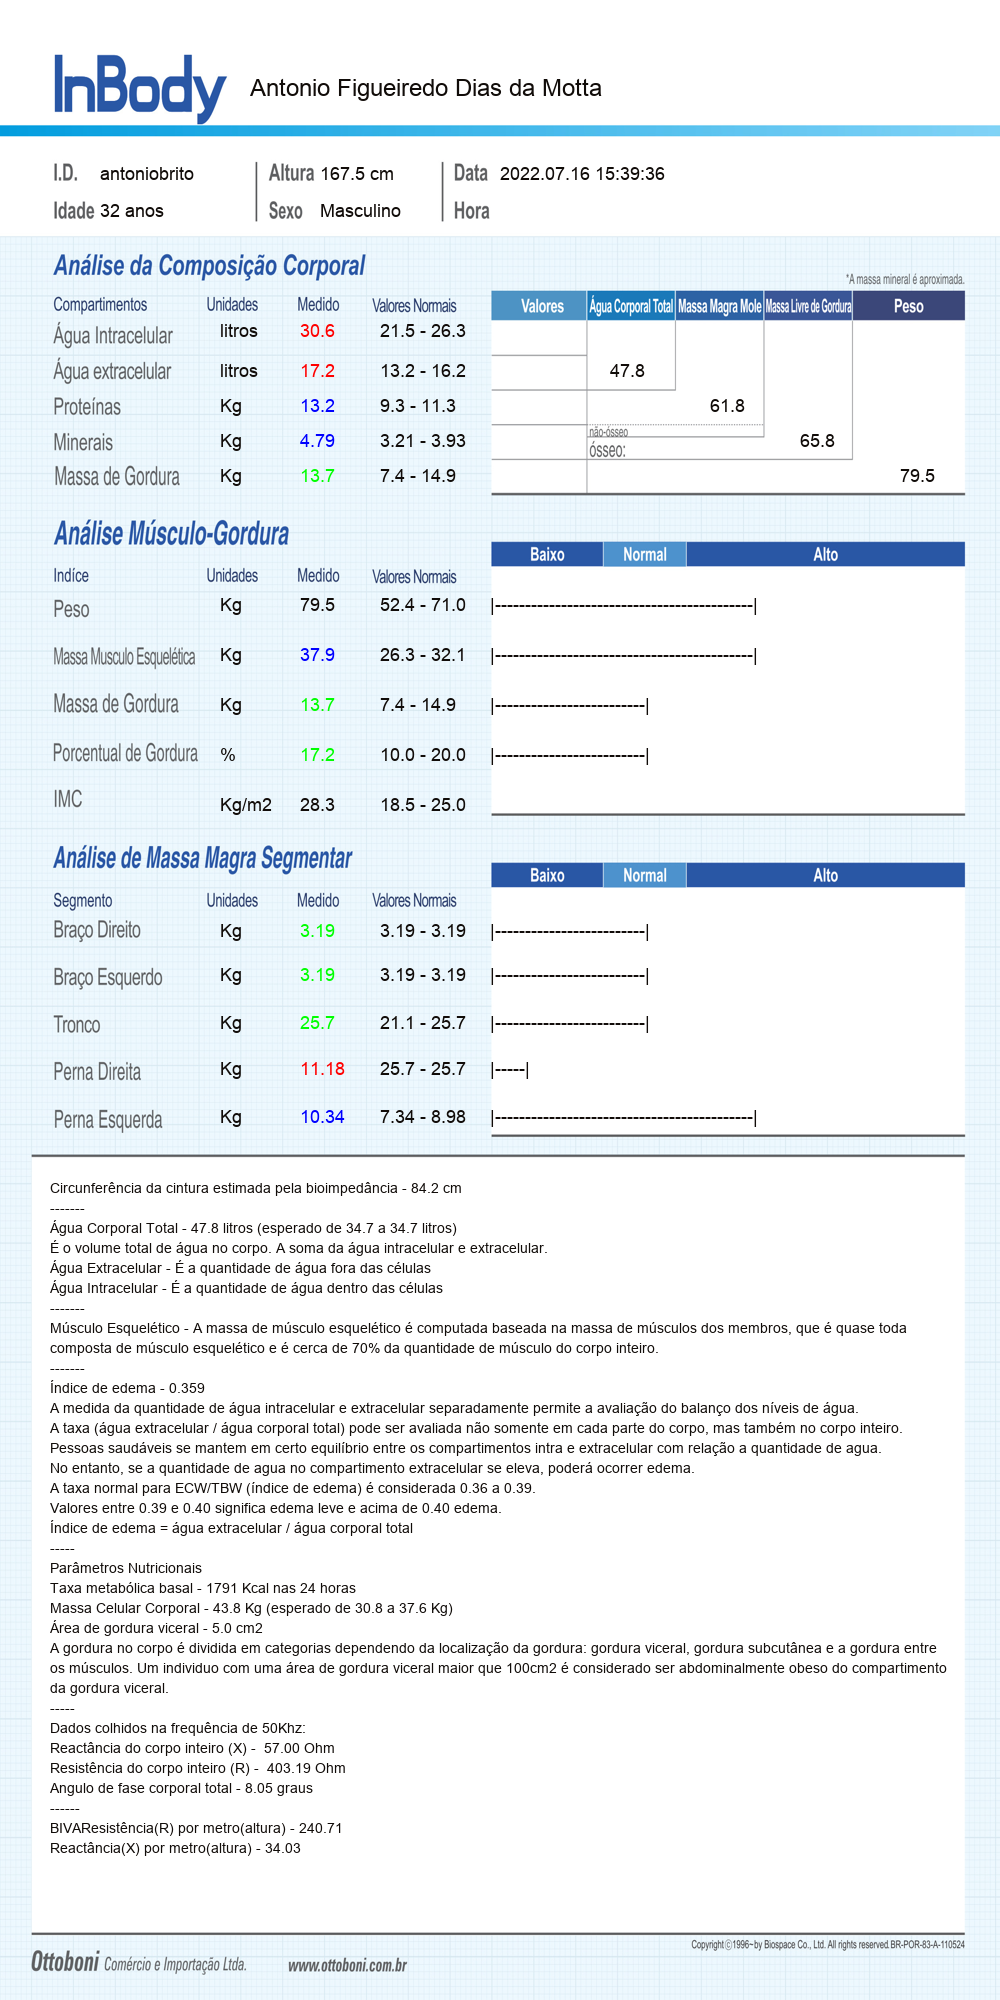

In [111]:
rp = ReportBio(pt,0)
rp.show((1000,2000))


In [ ]:
pd.set_option('display.max_columns', None)
bd.df

In [97]:
pt = Patient('Antonio Figueiredo Dias da Motta', '1', bd.create_array_of_bios([0,1,2]))

In [41]:
class Patient():

  def __init__(self, name, id, bios):#bios -> Array of Bio

    self.name = name
    self.id = id
    self.bios = self.include_bios(bios)

  def include_bios(self, bios):

    array = []
    
    if len(bios)>0:
      for item in bios:
        array.append(item)
    else:
      print('You must at least 1 item in array (bios)')
    
    return array

  def toJSON(self):
        return json.loads(json.dumps(self, default=lambda o: o.__dict__))


  

In [42]:
class BioData():

  def __init__(self, path):
    
    self.path = path
    self.df = self.read_S10_file()

    return 
  
  def read_S10_file(self):
    df = pd.read_csv(self.path)
    return df

  def filter(self, filter_by_id):
    df = self.df[['1.DATE&TIMES','2.ID']]
    filtered = df.loc[df['2.ID'] == filter_by_id]
    return filtered

  def list(self):
    return self.df[['1.DATE&TIMES', '2.ID']]

  def list_by_name(self):
    return np.array(self.list().sort_values(by=['2.ID']))

  def list_by_index(self):
    return np.array(self.list().sort_index().reset_index())

  def to_dictionary(self, index):
    return self.df.iloc[[index]].to_dict('records')[0]

  def create_array_of_bios(self, indexes):# indexes is an array of indexes
      return [Bio(self.to_dictionary(i)) for i in indexes]

In [105]:
#Criar um df
bd = BioData('/content/drive/MyDrive/inbody/S10_data.csv')
bd.df

,1.DATE&TIMES,2.ID,3.AGE,4.HEIGHT,5.SEX,6.WEIGHT,7.WEIGHT_MIN,8.WEIGHT_MAX,9.ICW,10.ICW_MIN,11.ICW_MAX,12.ECW,13.ECW_MIN,14.ECW_MAX,15.TBW(Total Body Water),16.TBW_MIN,17.TBW_MAX,18.Protein,19.Protein_MIN,20.Protein_MAX,21.Mineral,22.Mineral_MIN,23.Mineral_MAX,24.Fat,25.Fat_MIN,26.Fat_MAX,27.SLM(Soft Lean Mass),28.SLM_MIN,29.SLM_MAX,30.FFM(Fat Free Mass),31.FFM_MIN,32.FFM_MAX,33.SMM(Skeletal Muscle Mass),34.SMM_MIN,35.SMM_MAX,36.PBF(Percent Body Fat),37.PBF_MIN,38.PBF_MAX,39.BMI,40.BMI_MIN,41.BMI_MAX,42.Segmental Water(RA),43.Segmental Water(RA)_MIN,44.Segmental Water(RA)_MAX,45.Segmental Water(LA),46.Segmental Water(LA)_MIN,47.Segmental Water(LA)_MAX,48.Segmental Water(TR),49.Segmental Water(TR)_MIN,50.Segmental Water(TR)_MAX,51.Segmental Water(RL),52.Segmental Water(RL)_MIN,53.Segmental Water(RL)_MAX,54.Segmental Water(LL),55.Segmental Water(LL)_MIN,56.Segmental Water(LL)_MAX,57.ECW/TBW(Total),58.ECW/TBW(RA),59.ECW/TBW(LA),60.ECW/TBW(TR),61.ECW/TBW(RL),62.ECW/TBW(LL),63.Segmental Lean(RA),64.Segmental Lean(RA)_MIN,65.Segmental Lean(RA)_MAX,66.Segmental Lean(LA),67.Segmental Lean(LA)_MIN,68.Segmental Lean(LA)_MAX,69.Segmental Lean(TR),70.Segmental Lean(TR)_MIN,71.Segmental Lean(TR)_MAX,72.Segmental Lean(RL),73.Segmental Lean(RL)_MIN,74.Segmental Lean(RL)_MAX,75.Segmental Lean(LL),76.Segmental Lean(LL)_MIN,77.Segmental Lean(LL)_MAX,78.Body Cell Mass,79.BCM_MIN,80.BCM_MAX,81.Bone Mineral Contents,82.BMC_MIN,83.BMC_MAX,84.AC,85.AMC,86.Waist Cir.,87.VFA,88.BMR,89.TBW/FFM,90.1khz-RA Impedance,91.1khz-LA Impedance,92.1khz-TR Impedance,93.1khz-RL Impedance,94.1khz-LL Impedance,95.5khz-RA Impedance,96.5khz-LA Impedance,97.5khz-TR Impedance,98.5khz-RL Impedance,99.5khz-LL Impedance,100.50khz-RA Impedance,101.50khz-LA Impedance,102.50khz-TR Impedance,103.50khz-RL Impedance,104.50khz-LL Impedance,105.250khz-RA Impedance,106.250khz-LA Impedance,107.250khz-TR Impedance,108.250khz-RL Impedance,109.250khz-LL Impedance,110.500khz-RA Impedance,111.500khz-LA Impedance,112.500khz-TR Impedance,113.500khz-RL Impedance,114.500khz-LL Impedance,115.1Mhz-RA Impedance,116.1Mhz-LA Impedance,117.1Mhz-TR Impedance,118.1Mhz-RL Impedance,119.1Mhz-LL Impedance,120.5khz-RA Reactance,121.5khz-LA Reactance,122.5khz-TR Reactance,123.5khz-RL Reactance,124.5khz-LL Reactance,125.50khz-RA Reactance,126.50khz-LA Reactance,127.50khz-TR Reactance,128.50khz-RL Reactance,129.50khz-LL Reactance,130.250khz-RA Reactance,131.250khz-LA Reactance,132.250khz-TR Reactance,133.250khz-RL Reactance,134.250khz-LL Reactance,135.5khz-RA Phase Angle,136.5khz-LA Phase Angle,137.5khz-TR Phase Angle,138.5khz-RL Phase Angle,139.5khz-LL Phase Angle,140.50khz-RA Phase Angle,141.50khz-LA Phase Angle,142.50khz-TR Phase Angle,143.50khz-RL Phase Angle,144.50khz-LL Phase Angle,145.250khz-RA Phase Angle,146.250khz-LA Phase Angle,147.250khz-TR Phase Angle,148.250khz-RL Phase Angle,149.250khz-LL Phase Angle,150.Systolic,151.Diastolic,152.Heart Rate,153.Electrode,154.Posture,155.Access
0,2022.07.16 15:39:36,antoniobrito,32.0,167.5,1,79.5,52.4,71.0,30.6,21.5,26.3,17.2,13.2,16.2,47.8,34.7,42.5,13.2,9.3,11.3,4.79,3.21,3.93,13.7,7.4,14.9,61.8,44.5,54.5,65.8,45.1,56.2,37.9,26.3,32.1,17.2,10.0,20.0,28.3,18.5,25.0,2.60,2.07,2.53,2.48,2.07,2.53,19.9,16.5,20.2,8.62,5.76,7.04,7.99,5.76,7.04,0.359,0.373,0.377,0.359,0.352,0.358,3.35,2.50,3.38,3.19,2.50,3.38,25.7,21.1,25.7,11.18,7.34,8.98,10.34,7.34,8.98,43.8,30.8,37.6,4.02,2.65,3.23,32.3,27.2,84.2,5.0,1791,72.6,289.9,295.5,26.4,194.5,214.9,279.4,288.7,25.6,186.4,206.6,238.4,251.2,22.0,146.8,163.8,210.9,223.2,18.8,123.9,138.6,202.0,213.7,17.8,118.9,133.2,191.2,201.3,16.9,115.2,129.4,18.0,14.6,1.4,15.9,16.9,29.1,28.9,2.9,25.0,27.3,25.0,26.8,2.1,13.6,14.7,3.7,2.9,3.1,4.9,4.7,7.0,6.6,7.7,9.8,9.6,6.8,6.9,6.5,6.3,6.1,0,0,0,Touch Type,Lying Posture,None
1,2022.07.16 15:31:14,renataevaristo,33.0,184.0,0,83.2,61.9,83.7,25.6,23.0,28.0,16.3,14.1,17.3,41.9,37.1,45.3,11.1,9.9,12.1,4.49,3.43,4.19,25.7,13.4,26.7,53.7,47.6,58.2,57.5,47.3,60.4,31.4,28.2,34.4,30.9,18.0,28.0,24.6

In [112]:
bd.list()

,1.DATE&TIMES,2.ID
0,2022.07.16 15:39:36,antoniobrito
1,2022.07.16 15:31:14,renataevaristo
2,2022.07.16 15:24:04,monicaandrade
3,2022.07.16 15:09:56,joycesousa
4,2022.07.16 15:01:42,paulaarantes
...,...,...
89,2022.04.05 15:25:05,992790499
90,2022.04.04 16:35:51,988066055
91,2022.04.04 15:49:15,996667558
92,2022.03.28 15:42:34,9753434863


In [ ]:
 
# Save the edited image
img.save("car2.png")

In [10]:
import math

class Utils():

  def get_references(gender,ethinic,bmi,age,diseases):
      #gender = Male = M / Female = F
      #age = int
      #bmi = int (25 = 0-25)
      #ethinic = american, italian, american mexican, brasilian

      #-----------------------------------------------------------------------------------
      #População branca
      #Homens

      if gender == 'M' and 0<=bmi<=25 and 20<=age<=29 and ethinic == 'white_american':
          n,mean_r,std_r,mean_x,std_x,r = 193 ,286.5, 29.5, 42.7, 5.5, 0.58
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 0<=bmi<=25 and 30<=age<=39 and ethinic == 'white_american':
          n,mean_r,std_r,mean_x,std_x,r = 151, 290.8, 35.5, 41.1 , 6.0, 0.75
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 0<=bmi<=25 and 40<=age<=49 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 115, 291.1, 32.4, 39.9, 5.8, 0.69
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 0<=bmi<=25 and 50<=age<=59 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 97, 296.4, 37.4, 37.9, 6.3, 0.67
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 0<=bmi<=25 and age>=60 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 97, 304.5, 33.8, 37.2, 6.0, 0.60
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 20<=age<=29 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 128, 263.9, 27.0, 40.1, 5.6, 0.62
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 30<=age<=39 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 193, 265.3, 27.6, 38.8, 5.1, 0.74
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 40<=age<=49 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 188, 263.3, 27.9, 37.4, 5.3, 0.61
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 50<=age<=59 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 180, 267.2, 28.6, 35.4, 4.8, 0.66
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and age<=60 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 230, 270.4, 32.5, 33.1, 5.3, 0.64
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and 20<=age<=29 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 36, 237.8, 23.4, 35.8, 4.9, 0.72
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and 30<=age<=39 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 62, 239.7, 27.5, 34.7, 4.4, 0.68
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and 40<=age<=49 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 71, 238.7, 25.6, 33.9, 5.3, 0.66
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and 50<=age<=59 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 89, 241.6, 22.4, 32.3, 4.7, 0.41
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and age>=60 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 111, 248.3, 26.8, 31.5, 5.1, 0.60
          #print(n, mean_r,std_r,mean_x,std_x,r)

      #-----------------------------------------------------------------------------------
      #População negra
      #Mulheres

      elif gender == 'F' and 0<=bmi<=25 and 20<=age<=29 and ethinic == 'white_american':
          n,mean_r,std_r,mean_x,std_x,r = 280, 378.4, 44.0, 50.2, 7.3, 0.69
          #print(n, mean_r,std_r,mean_x,std_x,r'

      elif gender == 'F' and 0<=bmi<=25 and 30<=age<=39 and ethinic == 'white_american':
          n,mean_r,std_r,mean_x,std_x,r = 261, 370.7, 38.5, 47.7, 6.4, 0.69
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 0<=bmi<=25 and 40<=age<=49 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 182, 386.6, 44.0, 48.9, 7.2, 0.73

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 0<=bmi<=25 and 50<=age<=59 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 146, 393.0, 43.6, 46.9, 6.9, 0.64

          #print(n, mean_r,std_r,mean_x,std_x,r)
      elif gender == 'F' and 0<=bmi<=25 and age>=60 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 140, 406.1, 49.3, 45.0, 6.6, 0.57
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 25.1<=bmi<=30 and 20<=age<=29 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 70, 353.2, 36.7, 46.6, 7.0, 0.65

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 25.1<=bmi<=30 and 30<=age<=39 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 119, 351.0, 32.0, 46.6, 6.7, 0.68
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 25.1<=bmi<=30 and 40<=age<=49 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 134, 353.1, 35.8, 45.7, 6.3, 0.69
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 25.1<=bmi<=30 and 50<=age<=59 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 134, 353.1, 36.8, 43.8, 5.6, 0.51

          #print(n, mean_r,std_r,mean_x,std_x,r)
      elif gender == 'F' and 25.1<=bmi<=30 and age>=60 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 159, 362.1, 38.1, 42.9, 6.9, 0.64

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 20<=age<=29 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 29, 333.8, 43.4, 44.7, 5.4, 0.63

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 30<=age<=39 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 73, 318.5, 30.6, 43.1, 5.4, 0.57

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 40<=age<=49 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 77, 326.8, 33.7, 43.6, 7.3, 0.70

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 50<=age<=59 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 84, 330.1, 31.4, 40.7, 6.3, 0.68
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and age>=60 and ethinic == 'white_american': 
          n,mean_r,std_r,mean_x,std_x,r = 87, 337.3, 44.6, 39.6, 6.5, 0.57

          #print(n, mean_r,std_r,mean_x,std_x,r)
      #-----------------------------------------------------------------------------------
      #População negra
      #Homens

      elif gender == 'M' and 0<=bmi<=25 and 20<=age<=29 and ethinic == 'black_american':
          n,mean_r,std_r,mean_x,std_x,r = 217, 294.1, 33.4, 45.4, 6.8, 0.66

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 0<=bmi<=25 and 30<=age<=39 and ethinic == 'black_american':
          n,mean_r,std_r,mean_x,std_x,r = 182, 290.9, 35.2, 43.5, 6.4, 0.66
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'M' and 0<=bmi<=25 and 40<=age<=49 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 115, 298.6, 35.9, 42.0, 6.3, 0.70
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'M' and 0<=bmi<=25 and 50<=age<=59 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 55, 309.8, 43.2, 41.4, 7.7, 0.74
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'M' and 0<=bmi<=25 and age>=60 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 74, 312.7, 43.3, 38.0, 7.5, 0.68

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 20<=age<=29 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r =141, 264.2, 29.7, 41.5, 6.1, 0.74

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 30<=age<=39 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 153, 264.7, 31.1, 40.8, 6.0, 0.72

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 40<=age<=49 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 139 ,268.6, 27.3, 40.6, 6.5, 0.67

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and 50<=age<=59 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r =78, 267.5, 32.2, 37.3, 5.7, 0.72

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 25.1<=bmi<=30 and age>=60 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r =100, 275.0, 34.5, 36.4, 7.1, 0.73

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and 20<=age<=29 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 66, 246.4, 32.8, 39.6, 5.8, 0.65
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'M' and 30.1<=bmi<=35 and 30<=age<=39 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r =77, 243.1, 30.4, 38.1, 5.7, 0.80
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'M' and 30.1<=bmi<=35 and 40<=age<=49 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 57, 252.3, 27.9, 38.1, 5.7, 0.80
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'M' and 30.1<=bmi<=35 and 50<=age<=59 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 37, 244.3, 21.3, 32.9, 4.8, 0.69
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'M' and 30.1<=bmi<=35 and age>=60 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 56, 246.2, 32.3, 32.0, 6.0, 0.72
          #print(n, mean_r,std_r,mean_x,std_x,r)

      #-----------------------------------------------------------------------------------
      #População negra
      #Mulheres

      elif gender == 'F' and 0<=bmi<=25 and 20<=age<=29 and ethinic == 'black_american':
          n,mean_r,std_r,mean_x,std_x,r =207, 388.9, 48.6, 53.9, 8.7, 0.76

          #print(n, mean_r,std_r,mean_x,std_x,r'

      elif gender == 'F' and 0<=bmi<=25 and 30<=age<=39 and ethinic == 'black_american':
          n,mean_r,std_r,mean_x,std_x,r = 167, 387.1, 37.4, 52.6, 7.6, 0.62

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 0<=bmi<=25 and 40<=age<=49 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 75, 396.3, 44.9, 54.2, 8.4, 0.70
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'F' and 0<=bmi<=25 and 50<=age<=59 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 35, 398.2, 46.2, 48.8, 8.9, 0.85
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 0<=bmi<=25 and age>=60 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r =44, 412.2, 50.7, 49.8, 9.4, 0.51

          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'F' and 25.1<=bmi<=30 and 20<=age<=29 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 146, 349.8, 37.5, 49.3, 7.5, 0.75

          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'F' and 25.1<=bmi<=30 and 30<=age<=39 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 155, 355.5, 36.6, 50.4, 7.0, 0.73
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'F' and 25.1<=bmi<=30 and 40<=age<=49 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 125, 349.3, 36.3, 47.6, 6.7, 0.68
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'F' and 25.1<=bmi<=30 and 50<=age<=59 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 61, 358.9, 40.0, 47.1, 7.2, 0.75
          #print(n, mean_r,std_r,mean_x,std_x,r)


      elif gender == 'F' and 25.1<=bmi<=30 and age>=60 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 84, 365.9, 42.9, 45.9, 7.6, 0.65
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 20<=age<=29 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 75, 334.3, 32.0, 48.8, 5.7, 0.49
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 30<=age<=39 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 103, 328.6, 42.3, 47.1, 8.0, 0.68
          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 40<=age<=49 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 93, 320.8, 37.7, 45.0, 7.0, 0.65

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and 50<=age<=59 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r = 68, 327.4, 40.9, 42.9, 8.0, 0.54

          #print(n, mean_r,std_r,mean_x,std_x,r)

      elif gender == 'F' and 30.1<=bmi<=35 and age>=60 and ethinic == 'black_american': 
          n,mean_r,std_r,mean_x,std_x,r =72, 333.8, 38.2, 41.9, 6.7, 0.66
          #print(n, mean_r,std_r,mean_x,std_x,r)

      else:
          print('Paciente sem referência na literatura')
          n,mean_r,std_r,mean_x,std_x,r = 72, 333.8, 38.2, 41.9, 6.7, 0.66

      return (n, mean_r, std_r, mean_x, std_x, r)

  def whole_body_impedance(z_of_right_arm, z_of_trunk,z_of_right_leg):
    return z_of_trunk + z_of_right_arm + z_of_right_leg

  def whole_body_reactance(x_of_right_arm, x_of_trunk, x_of_right_leg):
    return x_of_right_arm + x_of_trunk + x_of_right_leg

  def resistence(impedance,reactance):
    return ((impedance**2)-(reactance**2))**0.5

  def whole_body_phase_angle(whole_body_impedance, whole_body_reactance):
    ratio = whole_body_reactance/whole_body_impedance
    return math.degrees(math.asin(ratio))